<a href="https://colab.research.google.com/github/MakC-Ukr/starknet-oracle-research/blob/main/src/colabs/Correlation_matrix_for_crypto_assets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet pycoingecko

In [ ]:
import pandas as pd
import requests
import datetime
from pycoingecko import CoinGeckoAPI
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

JSON_FILE = "empiric-events.json"
CSV_FILE = "/content/drive/MyDrive/oracle-data-starknet/" +str(time)+ "/empiric-events.csv"

In [ ]:
ONE_HOUR = 60*60
currTimeStamp = int(time.time())
end_time = currTimeStamp - 24 * ONE_HOUR
start_time_date = datetime.datetime(2021, 1,1)
start_time = int(time.mktime(start_time_date.timetuple()))
# the date below must be the same as in the line above
N_DAYS = (datetime.date.today() - datetime.date(2021,1,1)).days
end_time = currTimeStamp - 24 * ONE_HOUR

In [ ]:
def get_range_of_dates_for_column_names(n_days):
  datelist = pd.date_range(datetime.date.today() - datetime.timedelta(days = n_days), periods=n_days).tolist() 
  res = [str(i).split()[0] for i in datelist]
  return res

In [ ]:
assets_to_track = [
    "bitcoin", 
    "ethereum", 
    "aave", 
    "dai", 
    "chainlink", 
    "nusd", #SUSD
    "usd-coin", 
    "0x",
    "yearn-finance",
    "xsushi",
    "wrapped-bitcoin",
    "unicorn-token",
    "havven", #SNX
    "maker",
    "enjincoin",
    "defipulse-index",
    "convex-finance",
    "curve-dao-token",
    "basic-attention-token",
    "balancer",
    "ampleforth",
    "1inch",
    "tether",
    "paxos-standard",
    "true-usd",
    "gemini-dollar",
    "frax",
    "fei-usd",
    "binance-usd",
    "staked-ether",
    "ethereum-name-service",
    "decentraland",
    "rai",
    "republic-protocol",
    "renfil"
]

In [ ]:
t = time.time()
df_dict = {}
cg = CoinGeckoAPI()
for asset in assets_to_track:
  # print(asset)
  try:
    cg_data = np.array(cg.get_coin_market_chart_range_by_id(asset, "usd", start_time, end_time)['prices'])
    if len(cg_data) == N_DAYS:
      df_dict[asset] = cg_data[:,1]
    else:
      print("historical data not enough for : ", asset)
  except Exception as e:
    print("Could not get for id: ", asset)
    print(e)
    print()
  time.sleep(5)

print((time.time()- t)/60, "mins to run this cell")

historical data not enough for :  nusd
historical data not enough for :  xsushi
historical data not enough for :  convex-finance
historical data not enough for :  fei-usd
historical data not enough for :  ethereum-name-service
historical data not enough for :  rai
historical data not enough for :  renfil
3.024504820505778 mins to run this cell


In [ ]:
df = pd.DataFrame(df_dict).transpose()
df.columns = get_range_of_dates_for_column_names(len(df.columns))

In [ ]:
df_corr = df.transpose().corr()

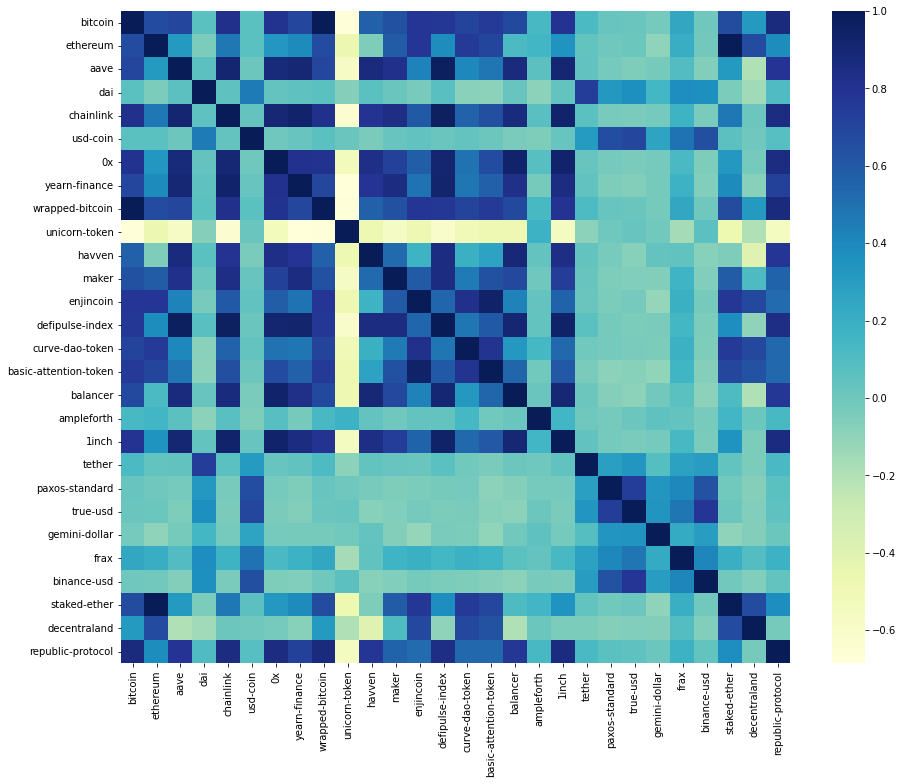

In [ ]:
plt.rcParams["figure.figsize"] = (15,12)
sns.heatmap(df_corr, cmap="YlGnBu")
plt.show()

In [ ]:
df_corr

,bitcoin,ethereum,aave,dai,chainlink,usd-coin,0x,yearn-finance,wrapped-bitcoin,unicorn-token,...,1inch,tether,paxos-standard,true-usd,gemini-dollar,frax,binance-usd,staked-ether,decentraland,republic-protocol
bitcoin,1.000000,0.672186,0.690631,0.068885,0.819081,0.070944,0.808739,0.696061,0.999962,-0.677206,...,0.792539,0.118316,0.027973,0.023894,-0.019878,0.239095,0.003745,0.668172,0.317337,0.863313
ethereum,0.672186,1.000000,0.319280,-0.042137,0.470026,0.065613,0.330116,0.388058,0.671929,-0.465134,...,0.354510,0.039175,-0.000182,0.014306,-0.093372,0.205961,-0.009699,0.999604,0.674553,0.385590
aave,0.690631,0.319280,1.000000,0.064785,0.909137,0.010441,0.878436,0.898569,0.690705,-0.577747,...,0.901649,0.047813,-0.015801,-0.053017,-0.021058,0.101348,-0.063972,0.318298,-0.196684,0.786623
dai,0.068885,-0.042137,0.064785,1.000000,0.057288,0.456688,0.035684,0.057009,0.068714,-0.070843,...,0.040210,0.736828,0.327157,0.369379,0.144834,0.380797,0.368278,-0.042517,-0.149989,0.108822
chainlink,0.819081,0.470026,0.909137,0.057288,1.000000,0.032420,0.897344,0.932042,0.819166,-0.634277,...,0.932430,0.066489,-0.030574,-0.036331,-0.015628,0.173534,-0.037481,0.467235,0.005864,0.848589
usd-coin,0.070944,0.065613,0.010441,0.456688,0.032420,1.000000,0.002137,0.025784,0.068726,0.024382,...,0.031609,0.314049,0.660736,0.695678,0.268902,0.492218,0.655679,0.062037,0.001919,0.078372
0x,0.808739,0.330116,0.878436,0.035684,0.897344,0.002137,1.000000,0.811560,0.808876,-0.531713,...,0.932982,0.028675,-0.016513,-0.038541,-0.014822,0.129582,-0.050792,0.325987,-0.019303,0.848623
yearn-finance,0.696061,0.388058,0.898569,0.057009,0.932042,0.025784,0.811560,1.000000,0.695898,-0.685477,...,0.851415,0.049803,-0.047949,-0.063732,-0.021184,0.183132,-0.055966,0.389467,-0.073704,0.720292
wrapped-bitcoin,0.999962,0.671929,0.690705,0.068714,0.819166,0.068726,0.808876,0.695898,1.000000,-0.676799,...,0.792659,0.117649,0.026268,0.021703,-0.020850,0.238041,0.000895,0.667921,0.316904,0.863578
unicorn-token,-0.677206,-0.465134,-0.577747,-0.070843,-0.634277,0.024382,-0.531713,-0.685477,-0.676799,1.000000,...,-0.551658,-0.090144,0.002722,0.028953,-0.003482,-0.161381,0.059932,-0.472935,-0.195892,-0.559784


In [ ]:
print("Correlation ENJ and CRV: ", df_corr['enjincoin']["curve-dao-token"])
print("Correlation REN and LINK: ", df_corr['republic-protocol']["chainlink"])
print("Correlation ETH and BTC: ", df_corr['ethereum']["bitcoin"])
print("Correlation ETH and UNI: ", df_corr['ethereum']["unicorn-token"])
print()
print("Correlation USDC and USDT: ", df_corr['usd-coin']["tether"])
print("Correlation BUSD and USDT: ", df_corr['binance-usd']["tether"])
print("Correlation BUSD and USDC: ", df_corr['binance-usd']["usd-coin"])
print("Correlation USDC and UNI: ", df_corr['usd-coin']["unicorn-token"])

Correlation ENJ and CRV:  0.8178007284543614
Correlation REN and LINK:  0.8485888970695801
Correlation ETH and BTC:  0.672185588170252
Correlation ETH and UNI:  -0.46513364354944947

Correlation USDC and USDT:  0.31404914403552564
Correlation BUSD and USDT:  0.3081266431088547
Correlation BUSD and USDC:  0.6556791216634941
Correlation USDC and UNI:  0.024381762168074052


**Werdly enough, the correlations are not what we expected. Let us do a sanity check of the data that we received from the API**

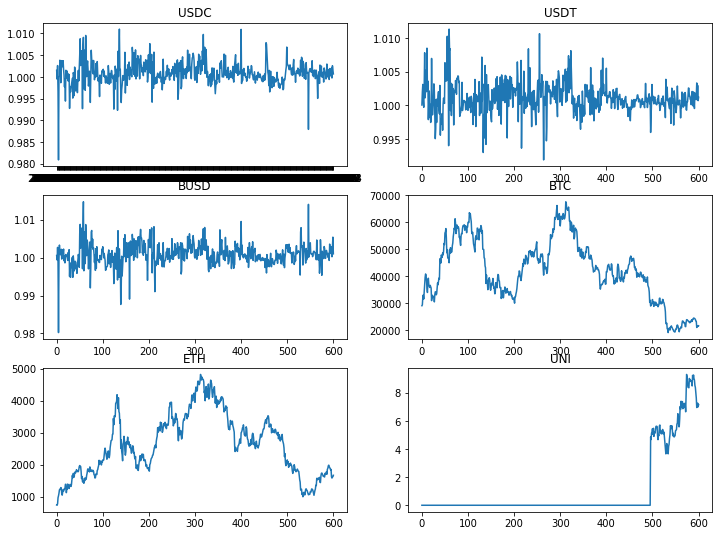

In [ ]:
plt.rcParams["figure.figsize"] = (12,9)
plt.subplot(3, 2, 1)
plt.title("USDC")
plt.plot(df_dict["usd-coin"])
plt.subplot(3, 2, 2)
plt.title("USDT")
plt.plot(df_dict["tether"])
plt.subplot(3, 2, 3)
plt.title("BUSD")
plt.plot(df_dict["binance-usd"])
plt.subplot(3, 2, 4)
plt.title("BTC")
plt.plot(df_dict["bitcoin"])
plt.subplot(3, 2, 5)
plt.title("ETH")
plt.plot(df_dict["ethereum"])
plt.subplot(3, 2, 6)
plt.title("UNI")
plt.plot(df_dict["unicorn-token"])

**Data is legit. It leaves two options : something is wrong with the way we are calculating correlations (probably not) OR correlation is not the correct metric to work with in this case**